### Comments 
- The main goal to this third analysis is to create a robust model, using different aproaches in order to identify patterns for fraudalent transactions, the following dataset contains very limitted features, and based on the previous results is a very important part for fraudalent transactions. 
- However this will help to futures researches: this dataset can also serve as a foundation for future research. Other researchers who encounter similar challenges may find this insight helpful in guiding for future investigations.
- Also to show the challenges and difficulties to achieve the ideal goal on Credit Card Fraud Detection with not a porper dataset disigned for that purpose. 
- The following Dataset is available in: https://data.gov.ie/dataset/cbm03-detailed-daily-card-payments/resource/bf7cfa88-5d7b-4139-a3f9-a7216d9fd07e?inner_span=True 

In [1]:
# Let's start importing the libraries we need for the project 
import pandas as pd
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE
from keras.layers import Dropout
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LassoCV

In [2]:
# Let's call the first lines of the dataset
df3 = pd.read_csv("CBM03.20230807224929.csv")
df3.head()

,STATISTIC,Statistic Label,TLIST(D1),Daily,C03634V04374,Daily and Seven Day Rolling Totals,UNIT,VALUE
0,CBM03C01,Debit Card Transactions - Total,2020M03D01,2020 March 01,10,Daily total,Number,3259740.0
1,CBM03C01,Debit Card Transactions - Total,2020M03D01,2020 March 01,20,Seven day rolling total,Number,NaN
2,CBM03C01,Debit Card Transactions - Total,2020M03D02,2020 March 02,10,Daily total,Number,3245856.0
3,CBM03C01,Debit Card Transactions - Total,2020M03D02,2020 March 02,20,Seven day rolling total,Number,NaN
4,CBM03C01,Debit Card Transactions - Total,2020M03D03,2020 March 03,10,Daily total,Number,3392281.0


In [3]:
# Check the last rows
df3.tail()

,STATISTIC,Statistic Label,TLIST(D1),Daily,C03634V04374,Daily and Seven Day Rolling Totals,UNIT,VALUE
9459,CBM03C14,Debit and Credit Card Volumes - Gross New Spen...,2021M01D30,2021 January 30,20,Seven day rolling total,Euro Thousand,1339817.0
9460,CBM03C14,Debit and Credit Card Volumes - Gross New Spen...,2021M01D31,2021 January 31,10,Daily total,Euro Thousand,126365.0
9461,CBM03C14,Debit and Credit Card Volumes - Gross New Spen...,2021M01D31,2021 January 31,20,Seven day rolling total,Euro Thousand,1355975.0
9462,CBM03C14,Debit and Credit Card Volumes - Gross New Spen...,2021M02D01,2021 February 01,10,Daily total,Euro Thousand,188213.0
9463,CBM03C14,Debit and Credit Card Volumes - Gross New Spen...,2021M02D01,2021 February 01,20,Seven day rolling total,Euro Thousand,1368385.0


In [4]:
# A general information of the dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9464 entries, 0 to 9463
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   STATISTIC                           9464 non-null   object 
 1   Statistic Label                     9464 non-null   object 
 2   TLIST(D1)                           9464 non-null   object 
 3   Daily                               9464 non-null   object 
 4   C03634V04374                        9464 non-null   int64  
 5   Daily and Seven Day Rolling Totals  9464 non-null   object 
 6   UNIT                                9464 non-null   object 
 7   VALUE                               9380 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 591.6+ KB


In [5]:
# Identify the values for ==> STATISTIC
df3["STATISTIC"].unique()

array(['CBM03C01', 'CBM03C02', 'CBM03C03', 'CBM03C04', 'CBM03C05',
       'CBM03C06', 'CBM03C07', 'CBM03C08', 'CBM03C09', 'CBM03C10',
       'CBM03C11', 'CBM03C12', 'CBM03C13', 'CBM03C14'], dtype=object)

In [6]:
# Identify the values for ==> Statistic Label
df3["Statistic Label"].unique()

array(['Debit Card Transactions - Total',
       'Debit Card Transactions - ATM Withdrawals',
       'Debit Card Transactions - Point of Sale',
       'Debit Card Volumes - Gross New Spending',
       'Debit Card Volumes - ATM Withdrawals',
       'Debit Card Volumes - Point of Sale',
       'Credit Card Transactions - Total on All Cards',
       'Credit Card Transactions - Personal Cards',
       'Credit Card Transactions - Business Cards',
       'Credit Card Volumes - Gross New Spending on All Cards',
       'Credit Card Volumes - Personal Cards',
       'Credit Card Volumes - Business Cards',
       'Debit and Credit Card Transactions - Total on All Cards',
       'Debit and Credit Card Volumes - Gross New Spending on All Cards'],
      dtype=object)

In [7]:
# Identify the values for ==> C03634V04374
df3["C03634V04374"].unique()

array([10, 20], dtype=int64)

In [8]:
# Identify the values for ==> UNIT
df3["UNIT"].unique()

array(['Number', 'Euro Thousand'], dtype=object)

### Comments 
-  Checking unique values helps to get a better understanding of the features 

In [9]:
# check for missing values
total = df3.isnull().sum().sort_values(ascending = False)
percent = (df3.isnull().sum()/df3.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,VALUE,STATISTIC,Statistic Label,TLIST(D1),Daily,C03634V04374,Daily and Seven Day Rolling Totals,UNIT
Total,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.887574,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Comments 
- Value contains 0.88% of null values, which is a very small percentage, and since we can't fill it with anything else, it's going to be dropped!

In [10]:
# Show null rows
df3[df3["VALUE"].isna()]

,STATISTIC,Statistic Label,TLIST(D1),Daily,C03634V04374,Daily and Seven Day Rolling Totals,UNIT,VALUE
1,CBM03C01,Debit Card Transactions - Total,2020M03D01,2020 March 01,20,Seven day rolling total,Number,NaN
3,CBM03C01,Debit Card Transactions - Total,2020M03D02,2020 March 02,20,Seven day rolling total,Number,NaN
5,CBM03C01,Debit Card Transactions - Total,2020M03D03,2020 March 03,20,Seven day rolling total,Number,NaN
7,CBM03C01,Debit Card Transactions - Total,2020M03D04,2020 March 04,20,Seven day rolling total,Number,NaN
9,CBM03C01,Debit Card Transactions - Total,2020M03D05,2020 March 05,20,Seven day rolling total,Number,NaN
...,...,...,...,...,...,...,...,...
8791,CBM03C14,Debit and Credit Card Volumes - Gross New Spen...,2020M03D02,2020 March 02,20,Seven day rolling total,Euro Thousand,NaN
8793,CBM03C14,Debit and Credit Card Volumes - Gross New Spen...,2020M03D03,2020 March 03,20,Seven day rolling total,Euro Thousand,NaN
8795,CBM03C14,Debit and Credit Card Volumes - Gross New Spen...,2020M03D04,2020 March 04,20,Seven day rolling total,Euro Thousand,NaN
8797,CBM03C14,Debit and Credit Card Volumes - Gross New Spen...,2020M03D05,2020 March 05,20,Seven day rolling total,Euro Thousand,NaN


### Comments
- Based on the previous analysis we can identify that Value (amount) is the feature most relevant for fraud detection for this reason we will proceed to drop the rows with null values, since they are just 84 rows which represent the 0.88% of the total amount in the dataset, as seen previously.

In [11]:
# Since the fact VALUE contains especific values,and we can not fill the Nun Values with any other, we drop tyhe rows. 
df3.dropna(subset=["VALUE"], inplace=True)  
# Checking updates for Nun Values
df3.isnull().sum()

STATISTIC                             0
Statistic Label                       0
TLIST(D1)                             0
Daily                                 0
C03634V04374                          0
Daily and Seven Day Rolling Totals    0
UNIT                                  0
VALUE                                 0
dtype: int64

# Label Encoding 
- This apprach help us to assing numerical values, to features that are categorical originally. 

In [12]:
#  Apply label encoding to: UNIT and Statistic, which are features we want to preserve.
le = LabelEncoder()
df3['UNIT'] = le.fit_transform(df3['UNIT'])
df3['STATISTIC'] = le.fit_transform(df3['STATISTIC'])

In [13]:
# Let's update changes 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9380 entries, 0 to 9463
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   STATISTIC                           9380 non-null   int32  
 1   Statistic Label                     9380 non-null   object 
 2   TLIST(D1)                           9380 non-null   object 
 3   Daily                               9380 non-null   object 
 4   C03634V04374                        9380 non-null   int64  
 5   Daily and Seven Day Rolling Totals  9380 non-null   object 
 6   UNIT                                9380 non-null   int32  
 7   VALUE                               9380 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 586.2+ KB


### DATA DESCRIPTION
- STATISTIC: Represents the Statistic label of the dataset.
- Statistic Label: Contains the infoirmation of the transaction made with the Debit Card
- TLIST(D1): Conatin a dictionary for Daily (Date features)
- Daily: Shows the date of the transaction
- C03634V04374: Contains values 10 or 20
- Daily and Seven Day Rolling Totals: Contains categorical values, shows if the transaction is daily or Seven Day Rolling Totals
- UNIT: 'Number', 'Euro Thousand' are the only units.
- VALUE: The amount of the transaction made.

In [14]:
# Drop irrelevant columns 
# Drop the columns that contain duplicate information, or provide just the dictionary of another column. 
df3 = df3.drop(columns=['Statistic Label','TLIST(D1)','Daily and Seven Day Rolling Totals'])
# Let's update changes 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9380 entries, 0 to 9463
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATISTIC     9380 non-null   int32  
 1   Daily         9380 non-null   object 
 2   C03634V04374  9380 non-null   int64  
 3   UNIT          9380 non-null   int32  
 4   VALUE         9380 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 366.4+ KB


In [15]:
# Update information
df3.head()

,STATISTIC,Daily,C03634V04374,UNIT,VALUE
0,0,2020 March 01,10,1,3259740.0
2,0,2020 March 02,10,1,3245856.0
4,0,2020 March 03,10,1,3392281.0
6,0,2020 March 04,10,1,3419662.0
8,0,2020 March 05,10,1,3860407.0


In [16]:
# Convert the date column to datetime objects
df3['Daily'] = pd.to_datetime(df3['Daily'], format="%Y %B %d")

# Extract year, month, and day into separate columns
df3['year'] = df3['Daily'].dt.year.astype('int64')
df3['month'] = df3['Daily'].dt.month.astype('int64')
df3['day'] = df3['Daily'].dt.day.astype('int64')

# Drop the 'Daily' column
df3 = df3.drop(columns=['Daily'])

# Display the resulting DataFrame
print(df3)

      STATISTIC  C03634V04374  UNIT      VALUE  year  month  day
0             0            10     1  3259740.0  2020      3    1
2             0            10     1  3245856.0  2020      3    2
4             0            10     1  3392281.0  2020      3    3
6             0            10     1  3419662.0  2020      3    4
8             0            10     1  3860407.0  2020      3    5
...         ...           ...   ...        ...   ...    ...  ...
9459         13            20     0  1339817.0  2021      1   30
9460         13            10     0   126365.0  2021      1   31
9461         13            20     0  1355975.0  2021      1   31
9462         13            10     0   188213.0  2021      2    1
9463         13            20     0  1368385.0  2021      2    1

[9380 rows x 7 columns]


### Comments 
- Based on the previous results, we could see that there could be realtion with just day, month or year. For this reason it is better to explode them to get a better result. 

In [17]:
# let's convert all data to dtype == int64
df3 = df3.astype('int64')
df3.dtypes

STATISTIC       int64
C03634V04374    int64
UNIT            int64
VALUE           int64
year            int64
month           int64
day             int64
dtype: object

In [18]:
# Description of the features
df3.describe()

,STATISTIC,C03634V04374,UNIT,VALUE,year,month,day
count,9380.000000,9380.000000,9380.000000,9.380000e+03,9380.000000,9380.000000,9380.00000
mean,6.500000,14.955224,0.500000,2.690275e+06,2020.095522,6.922388,15.88806
std,4.031344,5.000066,0.500027,6.602991e+06,0.293951,3.321740,8.83110
min,0.000000,10.000000,0.000000,0.000000e+00,2020.000000,1.000000,1.00000
25%,3.000000,10.000000,0.000000,3.017650e+04,2020.000000,4.000000,8.00000
50%,6.500000,10.000000,0.500000,2.114115e+05,2020.000000,7.000000,16.00000
75%,10.000000,20.000000,1.000000,1.517516e+06,2020.000000,10.000000,24.00000
max,13.000000,20.000000,1.000000,3.050376e+07,2021.000000,12.000000,31.00000


In [19]:
# Lets group the numerical values related with the feature: UNIT
df3.groupby("UNIT").mean()

,STATISTIC,C03634V04374,VALUE,year,month,day
UNIT,,,,,,
0,7.857143,14.955224,3.272676e+05,2020.095522,6.922388,15.88806
1,5.142857,14.955224,5.053281e+06,2020.095522,6.922388,15.88806


In [20]:
# Lets group the numerical values related with the feature: STATISTIC
df3.groupby("STATISTIC").mean()

,C03634V04374,UNIT,VALUE,year,month,day
STATISTIC,,,,,,
0,14.955224,1.0,1.063929e+07,2020.095522,6.922388,15.88806
1,14.955224,1.0,6.925492e+05,2020.095522,6.922388,15.88806
2,14.955224,1.0,9.946737e+06,2020.095522,6.922388,15.88806
3,14.955224,0.0,6.698951e+05,2020.095522,6.922388,15.88806
4,14.955224,0.0,1.354650e+05,2020.095522,6.922388,15.88806
5,14.955224,0.0,5.344301e+05,2020.095522,6.922388,15.88806
6,14.955224,1.0,1.151704e+06,2020.095522,6.922388,15.88806
7,14.955224,1.0,1.043881e+06,2020.095522,6.922388,15.88806
8,14.955224,1.0,1.078229e+05,2020.095522,6.922388,15.88806


In [21]:
# Lets group the numerical values related with the feature: VALUE
df3.groupby("VALUE").mean()

,STATISTIC,C03634V04374,UNIT,year,month,day
VALUE,,,,,,
0,6.333333,14.776119,0.777778,2020.477612,6.701493,16.455224
775,11.000000,10.000000,0.000000,2020.000000,4.000000,12.000000
819,11.000000,10.000000,0.000000,2020.000000,3.000000,29.000000
885,11.000000,10.000000,0.000000,2020.000000,4.000000,5.000000
978,11.000000,10.000000,0.000000,2020.000000,5.000000,10.000000
...,...,...,...,...,...,...
30198664,12.000000,20.000000,1.000000,2020.000000,9.000000,5.000000
30287537,12.000000,20.000000,1.000000,2020.000000,9.000000,4.000000
30354645,12.000000,20.000000,1.000000,2020.000000,9.000000,3.000000


In [22]:
def get_total_duplicate_rows(df3):
    # Read the dataset into a Pandas DataFrame
    df3 = pd.read_csv(df3)

    # Find duplicate rows in the DataFrame
    duplicate_mask = df3.duplicated()

    # Get the total number of duplicated rows
    total_duplicates = duplicate_mask.sum()

    return total_duplicates

# Test the function
csv_file = "credit_card_fraud.csv"
total_duplicates = get_total_duplicate_rows(csv_file)
print("Total duplicated rows:", total_duplicates)

Total duplicated rows: 0


### Comments
- This will help us to determine whether our data set contains a duplicate row or not.

In [23]:
# Count the occurrences of each unique value in the "UNIT" column
Unit_counts = df3["UNIT"].value_counts()

# Access the counts for 0 and 1
count_of_zeros = Unit_counts.get(0, 0)  # Get the count of 0s, default to 0 if not present
count_of_ones = Unit_counts.get(1, 0)   # Get the count of 1s, default to 0 if not present

print("Count of 0s:", count_of_zeros)
print("Count of 1s:", count_of_ones)

Count of 0s: 4690
Count of 1s: 4690


# Data Visualisations

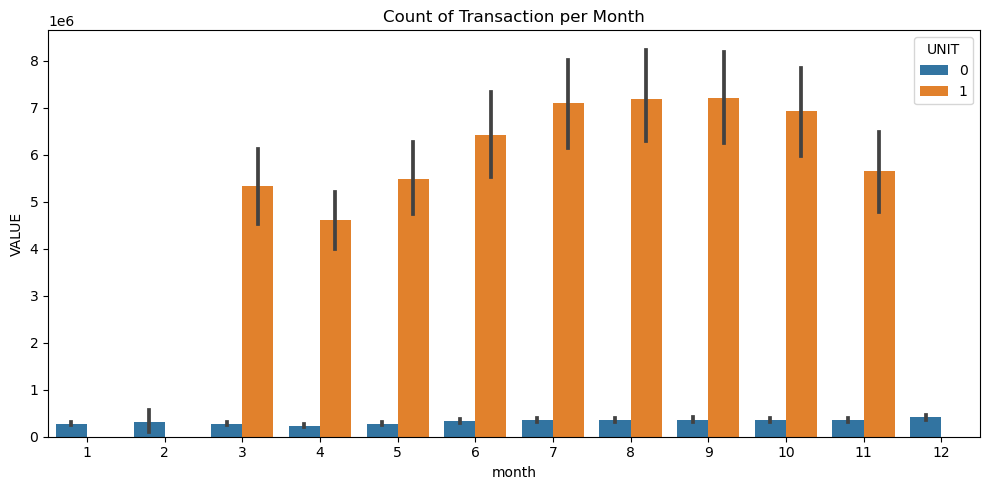

In [24]:
# Plot the distribution
fig, ax = plt.subplots(1,1, figsize=(10,5)) # create a plot grid to view all at once
ax.set_title("Count of Transaction per Month") # Set graph title 
g = sns.barplot(data=df3, x="month", y="VALUE", hue="UNIT", ax=ax) 
plt.tight_layout()

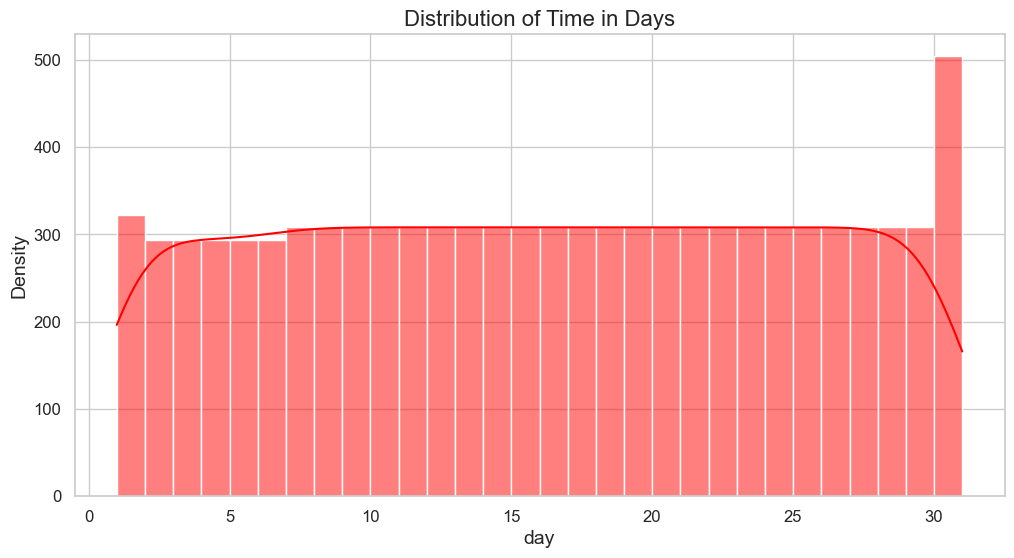

In [25]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the histogram with a kernel density estimate (KDE)
sns.histplot(df3['day'], color='red', kde=True, bins=30)

# Add title and labels
plt.title('Distribution of Time in Days', fontsize=16)
plt.xlabel('day', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Adjust tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

# Preprocessing

In [26]:
# scaling needs to be done for Amount column only
ss = StandardScaler()
df3["NormalizedValue"]=ss.fit_transform(df3["VALUE"].values.reshape(-1,1))
df3.head()

,STATISTIC,C03634V04374,UNIT,VALUE,year,month,day,NormalizedValue
0,0,10,1,3259740,2020,3,1,0.086248
2,0,10,1,3245856,2020,3,2,0.084145
4,0,10,1,3392281,2020,3,3,0.106322
6,0,10,1,3419662,2020,3,4,0.110469
8,0,10,1,3860407,2020,3,5,0.177222


# Identify Correlation with the features

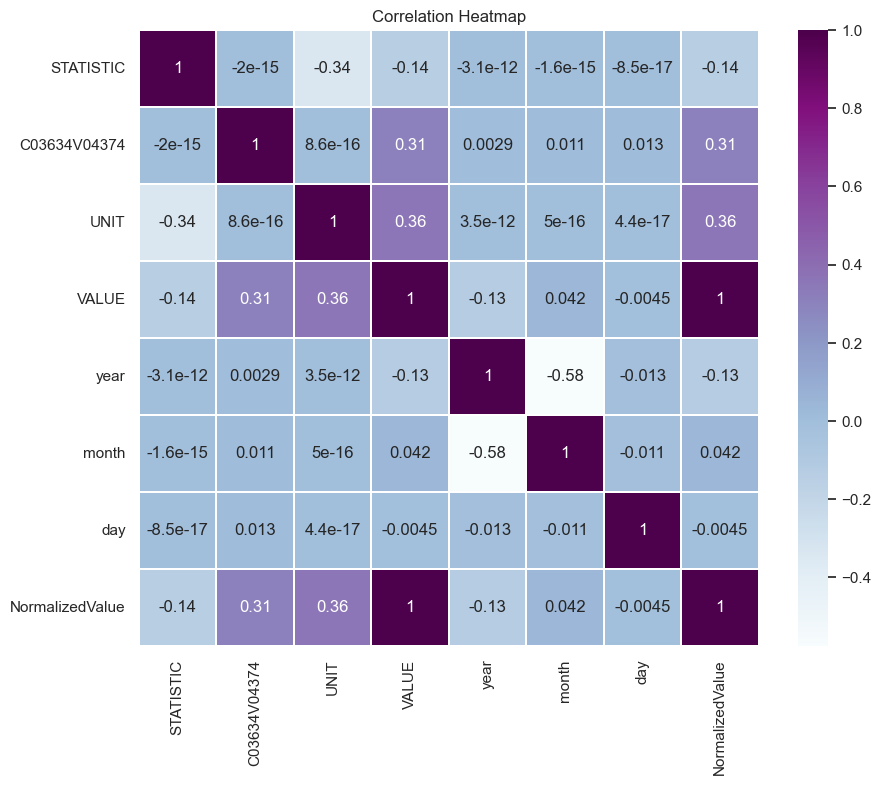

In [27]:
# correlation heatmap:
corr = df3.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap="BuPu", annot=True)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Correlation between features')

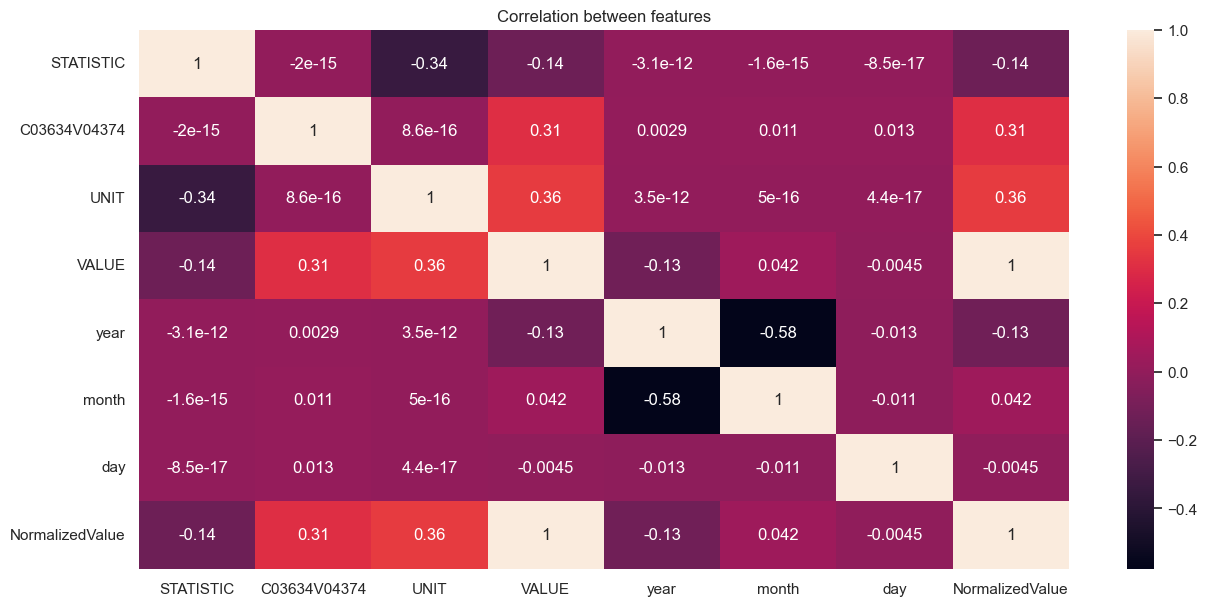

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(df3.corr(), annot=True)
plt.title("Correlation between features")

# SMOTE to handle class imbalance

In [29]:
features = df3.drop('UNIT', axis=1)
labels = df3['UNIT']

Best alpha using built-in LassoCV: 1181.503481
Best score using built-in LassoCV: 0.128084
Lasso picked 1 variables and eliminated the other 6 variables


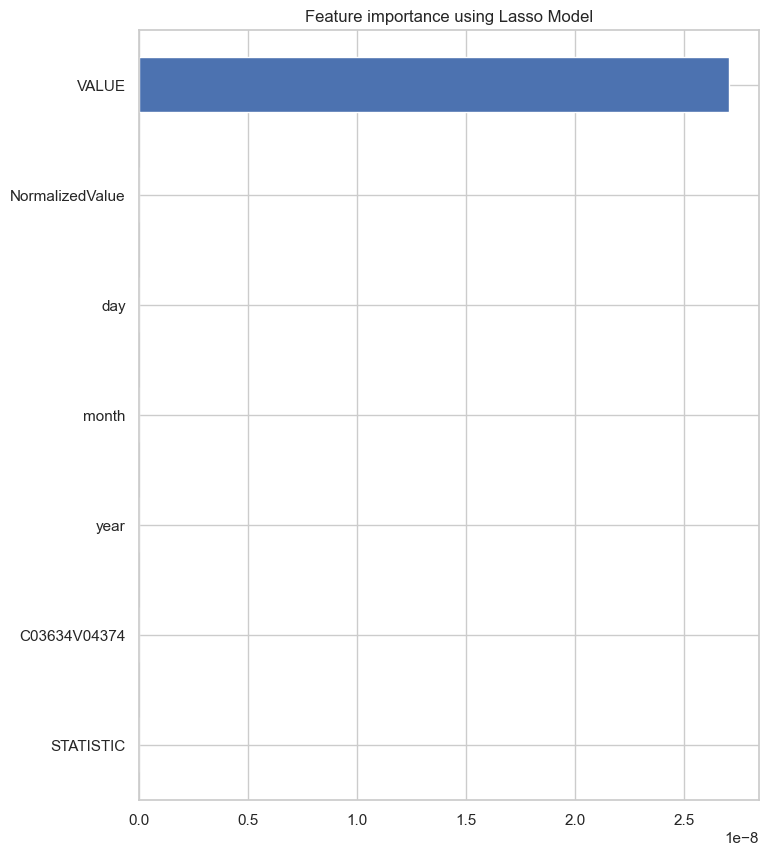

In [30]:
X_cols = ['STATISTIC', 'C03634V04374', 'VALUE', 'year', 'month', 'day', 'NormalizedValue' ] 
Y_cols = 'UNIT'  

# Feature selection
x = df3[X_cols]  # Feature Matrix
y = df3[Y_cols]  # Target Variable

reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" % reg.score(x, y))
coef = pd.Series(reg.coef_, index=x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +
      str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Feature importance using Lasso Model")
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

print("Number samples X_train dataset: ", X_train.shape)
print("Number samples y_train dataset: ", y_train.shape)
print("Number samples X_test dataset: ", X_test.shape)
print("Number samples y_test dataset: ", y_test.shape)

Number samples X_train dataset:  (6566, 7)
Number samples y_train dataset:  (6566,)
Number samples X_test dataset:  (2814, 7)
Number samples y_test dataset:  (2814,)


In [32]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=10)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3282
Before OverSampling, counts of label '0': 3284 

After OverSampling, the shape of train_X: (6568, 7)
After OverSampling, the shape of train_y: (6568,) 

After OverSampling, counts of label '1': 3284
After OverSampling, counts of label '0': 3284


# Define X(predictors) and Y(label/target)
- According to the output obtaines, since the dataset is very limited of features, as we could identify in the previous analysis, there are different factors that could be involved to detect credit card frau, however this dataset doesn't contains those relavant features. 
- So, let's see how it performs. 

## Splitting of data in training and testing

In [33]:
# Splitting the oversampled data into training and testing sets
xtrain_res, xtest, ytrain_res, ytest = train_test_split(X_train_res, y_train_res, test_size=0.3, random_state=0)

# Print the shapes and counts
print('After OverSampling, the shape of train_X: {}'.format(xtrain_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(ytrain_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(ytrain_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(ytrain_res == 0)))

After OverSampling, the shape of train_X: (4597, 7)
After OverSampling, the shape of train_y: (4597,) 

After OverSampling, counts of label '1': 2301
After OverSampling, counts of label '0': 2296


In [34]:
xtrain_res.shape, xtest.shape, ytrain_res.shape, ytest.shape

((4597, 7), (1971, 7), (4597,), (1971,))

# Neural Network

In [35]:
# Define your neural network model
model = Sequential([
    Dense(units=16, input_dim=7, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(units=20, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Model Training

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train your model using the oversampled training data
model.fit(xtrain_res, ytrain_res, batch_size=15, epochs=5)

Epoch 1/5
307/307 [==============================] - 1s 900us/step - loss: 14452.1865 - accuracy: 0.5051
Epoch 2/5
307/307 [==============================] - 0s 850us/step - loss: 2077.4944 - accuracy: 0.5182
Epoch 3/5
307/307 [==============================] - 0s 829us/step - loss: 658.8130 - accuracy: 0.5377
Epoch 4/5
307/307 [==============================] - 0s 965us/step - loss: 169.7999 - accuracy: 0.5749
Epoch 5/5
307/307 [==============================] - 0s 872us/step - loss: 137.1003 - accuracy: 0.5780


In [37]:
model.evaluate(xtest,ytest)

62/62 [==============================] - 0s 737us/step - loss: 36.5913 - accuracy: 0.5647


[36.59130859375, 0.564687967300415]

# Prediction of the dataset

62/62 [==============================] - 0s 646us/step
Head of the prediction array:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Accuracy score is:  0.5647
Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.37      0.46       988
           1       0.55      0.76      0.64       983

    accuracy                           0.56      1971
   macro avg       0.58      0.57      0.55      1971
weighted avg       0.58      0.56      0.55      1971

Confusion Matrix: 
 [[362 626]
 [232 751]]


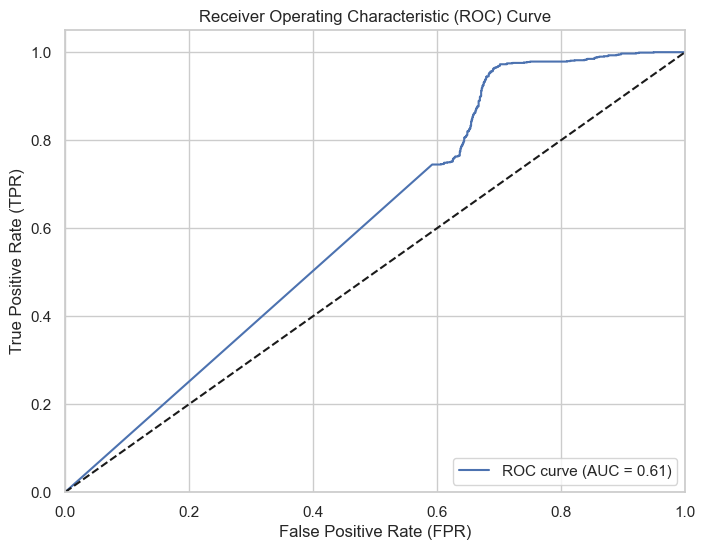

206/206 [==============================] - 0s 576us/step


In [38]:
# Make predictions on the test set
y_pred = model.predict(xtest)

# Print the head of the prediction array
print("Head of the prediction array:")
print(y_pred[:5])  # Print the first 5 rows

# Calculate and print accuracy, classification report, and confusion matrix
print('Accuracy score is: ', round(accuracy_score(ytest, y_pred.round()), 4))
print("============================================")
print('Classification report: \n', classification_report(ytest, y_pred.round()))
print("============================================")
print('Confusion Matrix: \n', confusion_matrix(ytest, y_pred.round()))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(ytest, y_pred)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Make predictions on the entire dataset
y_pred = model.predict(X_train_res)
y_expected = y_train_res

In [39]:
# Make predictions on the test dataset
y_pred = model.predict(xtest)

# Round the predictions to 0 or 1
rounded_predictions = y_pred.round()

# Count the number of 0s and 1s in the predictions
count_0 = np.sum(rounded_predictions == 0)
count_1 = np.sum(rounded_predictions == 1)

print("Count of predictions as 0:", count_0)
print("Count of predictions as 1:", count_1)

62/62 [==============================] - 0s 580us/step
Count of predictions as 0: 594
Count of predictions as 1: 1377


# Conclusion
- There were several obstacles in using this dataset, beginning with the extremely few rows and features, especially because we had previously established the necessity of having enough characteristics to discover patterns. 
- In addition, I had difficulty with information collecting in general due to data protection and sensitive credit card information. 
- Different techniques were investigated, but they did not provide the desired results because the data was not labelled and was not developed specifically for this purpose, therefore we utilised one of the characteristics that may have parallels with binary classification and prediction. 
- Regardless of the problem-solving method used, skills and the capacity to adapt to difficult conditions are required for data analytics.
